In [10]:
from qiskit.quantum_info import random_statevector, Statevector, Clifford
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector

import numpy as np
%matplotlib inline

In [11]:
single_qubit_cliffords = [
 'i',
 'h', 's',
 'hs', 'sh', 'ss',
 'hsh', 'hss', 'shs', 'ssh', 'sss',
 'hshs', 'hssh', 'hsss', 'shss', 'sshs',
 'hshss', 'hsshs', 'shssh', 'shsss', 'sshss',
 'hshssh', 'hshsss', 'hsshss'
]

In [12]:
def apply_clifford_from_string(qc, clifford_string):
    for gate in clifford_string:
        #instr = (gate, qubit)
        #getattr(qc, instr[0])(instr[1])
        getattr(qc, gate)(qc.qubits)
    return qc
        
def apply_clifford(qc, clifford):

    if isinstance(clifford, str):
        apply_clifford_from_string(qc, clifford)
        
    else:
        cliff_circ = clifford.to_circuit()
        qc = qc.compose(cliff_circ)
    #print(qc.draw())
    return qc

In [13]:
states = []
num_qubits = 1
for clifford in single_qubit_cliffords:
    vec = Statevector.from_label('0'*num_qubits) # |0\rangle

    qc = QuantumCircuit(num_qubits)
    qc = apply_clifford(qc, clifford)
    new_vec = vec.evolve(qc)
    states.append(new_vec.data)
states = np.array(states)

In [14]:
def state_to_cartesian(state):
    ket = state
    bra = ket.conj()
    rho = np.outer(ket,bra)
    
    z = (2*rho[0,0] - 1)
    x = rho[0,1] + rho[1,0]
    y = (rho[1,0] - rho[0,1])/1j
    return [x.real,y.real,z.real]

In [15]:
states

array([[ 1.        +0.j        ,  0.        +0.j        ],
       [ 0.70710678+0.j        ,  0.70710678+0.j        ],
       [ 1.        +0.j        ,  0.        +0.j        ],
       [ 0.70710678+0.j        ,  0.        +0.70710678j],
       [ 0.70710678+0.j        ,  0.70710678+0.j        ],
       [ 1.        +0.j        ,  0.        +0.j        ],
       [ 0.5       +0.5j       ,  0.5       -0.5j       ],
       [ 0.70710678+0.j        , -0.70710678+0.j        ],
       [ 0.70710678+0.j        ,  0.        +0.70710678j],
       [ 0.70710678+0.j        ,  0.70710678+0.j        ],
       [ 1.        +0.j        ,  0.        +0.j        ],
       [ 0.5       +0.5j       ,  0.5       +0.5j       ],
       [ 0.        +0.j        ,  1.        +0.j        ],
       [ 0.70710678+0.j        ,  0.        -0.70710678j],
       [ 0.70710678+0.j        , -0.70710678+0.j        ],
       [ 0.70710678+0.j        ,  0.        +0.70710678j],
       [ 0.5       +0.5j       , -0.5       +0.5j       

In [16]:
distinct = [0,1,3,6,7,12]
state_coor = [state_to_cartesian(state) for state in states[distinct]]

In [17]:
states[distinct]

array([[ 1.        +0.j        ,  0.        +0.j        ],
       [ 0.70710678+0.j        ,  0.70710678+0.j        ],
       [ 0.70710678+0.j        ,  0.        +0.70710678j],
       [ 0.5       +0.5j       ,  0.5       -0.5j       ],
       [ 0.70710678+0.j        , -0.70710678+0.j        ],
       [ 0.        +0.j        ,  1.        +0.j        ]])

In [18]:
state_coor

[[0.0, 0.0, 1.0],
 [0.9999999999999998, 0.0, -2.220446049250313e-16],
 [0.0, 0.9999999999999998, -2.220446049250313e-16],
 [0.0, -0.9999999999999996, -4.440892098500626e-16],
 [-0.9999999999999998, 0.0, -2.220446049250313e-16],
 [0.0, 0.0, -1.0]]

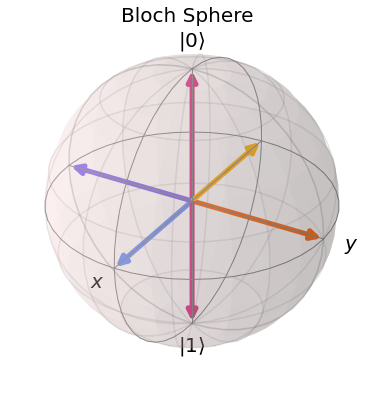

In [19]:
plot_bloch_vector(state_coor, title="Bloch Sphere")